#1
## import pandas to read data
## import matplotlib for plotting
## import numpy


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path('/content/drive/MyDrive/machinelearning dataset')
dlin = pd.read_csv(data_dir/ 'hba1c_bloodGlucose_selected_use_train_test_0.5_seed_31.csv', index_col=0)
print('data head')
print(dlin.columns)
print(len(dlin))
print(dlin.head())

data head
Index(['hba1c', 'rbg_scaled'], dtype='object')
28
         hba1c  rbg_scaled
169   8.555813    0.879085
93    6.972834    0.330065
246  10.594119    1.846405
4     5.187378    0.454248
99    7.077409    0.905229


#2
##set the numpy random number generator seed to 31 by calling np.random.seed(31) so your results are deterministic and will do what I expect
##import train_test_split()

In [ ]:
np.random.seed(31)

from sklearn.model_selection import train_test_split

all_data = dlin.iloc[0:28]
print('all_data shape', all_data.shape)

dlin_fit, dlin_test = train_test_split(all_data, test_size = 0.5)
print("dlin_fit type", type(dlin_fit))
print("fit data shape", dlin_fit.shape, "test", dlin_test.shape)

# data_fit = dlin.iloc[0:14]
# data_validation = dlin.iloc[14:28]
# print(data_fit)
# print(data_validation)

all_data shape (28, 2)
dlin_fit type <class 'pandas.core.frame.DataFrame'>
fit data shape (14, 2) test (14, 2)


#3

intercept, slope 3.5461366221647124 [ 0.         10.13582137 -7.52338767  2.22669517]


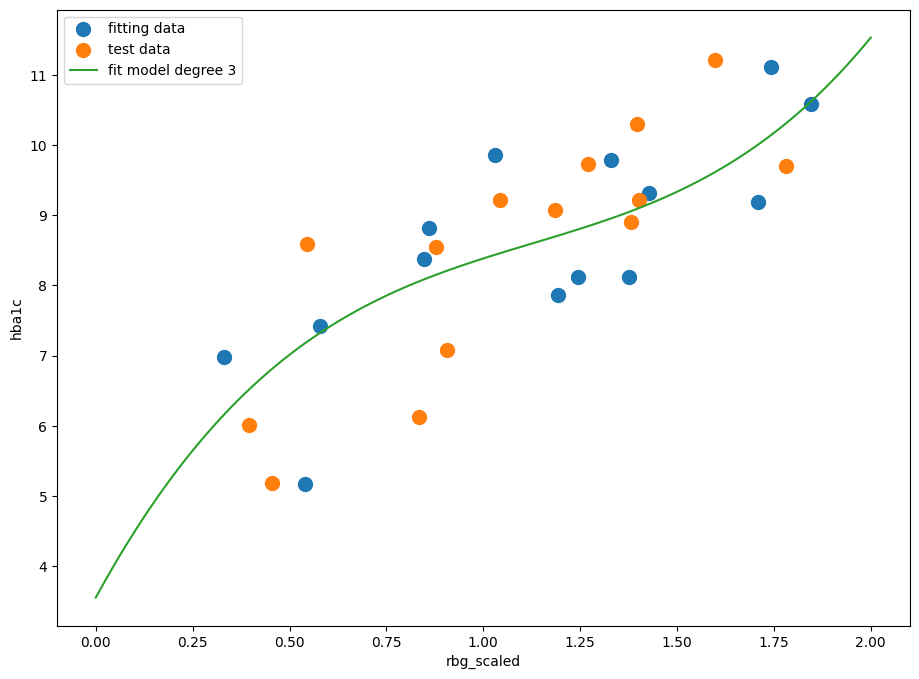

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

m = LinearRegression()

p3 = PolynomialFeatures(3)
fit_features = p3.fit_transform(dlin_fit[['rbg_scaled']])
m.fit(fit_features, dlin_fit['hba1c'])
print("intercept, slope", m.intercept_, m.coef_)

figsize = (11, 8)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(dlin_fit[ 'rbg_scaled'] , dlin_fit['hba1c'], s=100, label='fitting data', c='C0')
ax.scatter(dlin_test[ 'rbg_scaled'] , dlin_test['hba1c'], s=100, label='test data', c='C1')

model_x = np.linspace(0,2, 100)
prediction_features = p3.fit_transform(model_x.reshape((-1,1)))
predictions = m.predict(prediction_features)
ax.plot(model_x, predictions, label='fit model degree 3', c='C2')
ax.set_xlabel('rbg_scaled')
ax.set_ylabel('hba1c')
ax.legend()
fig.show()


#4


In [ ]:
# score of fitting data

s_fitting = m.score(fit_features, dlin_fit["hba1c"])
print('fitting data score', s_fitting)

# score of testing data

test_features = p3.fit_transform(dlin_test[['rbg_scaled']])
s_testing = m.score(test_features, dlin_test['hba1c'])
print('testing data score', s_testing)

fitting data score 0.6237055025260223
testing data score 0.6012152949575463


#The model is underfit because both fitting data score and testing data score are low, and the data points mostly do not align with the predicted curve.

#5

fitting data score 0.935141183766417
testing data score -22.39192482729845


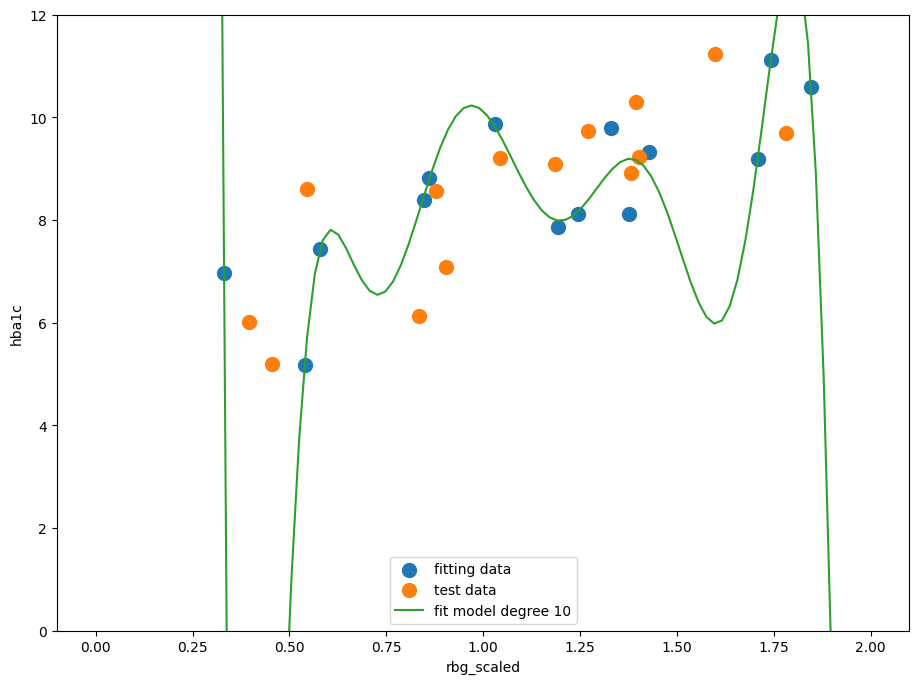

In [ ]:
# from sklearn.linear_model import LinearRegression

# from sklearn.preprocessing import PolynomialFeatures

m_p10 = LinearRegression()

p10 = PolynomialFeatures(10)
fit_p10_features = p10.fit_transform(dlin_fit[['rbg_scaled']])
m_p10.fit(fit_p10_features, dlin_fit['hba1c'])
# print("intercept, slope", m_p10.intercept_, m_10.coef_)

figsize = (11, 8)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(dlin_fit[ 'rbg_scaled'] , dlin_fit['hba1c'], s=100, label='fitting data', c='C0')
ax.scatter(dlin_test[ 'rbg_scaled'] , dlin_test['hba1c'], s=100, label='test data', c='C1')

model_x = np.linspace(0,2, 100)
prediction_features = p10.fit_transform(model_x.reshape((-1,1)))
predictions_p10 = m_p10.predict(prediction_features)
ax.plot(model_x, predictions_p10, label='fit model degree 10', c='C2')
ax.set_xlabel('rbg_scaled')
ax.set_ylabel('hba1c')
ax.set_ylim(0, 12)
ax.legend()
fig.show()

# score of fitting data

s_fitting_p10 = m_p10.score(fit_p10_features, dlin_fit["hba1c"])
print('fitting data score', s_fitting_p10)

# score of testing data

test_p10_features = p10.fit_transform(dlin_test[['rbg_scaled']])
s_testing_p10 = m_p10.score(test_p10_features, dlin_test['hba1c'])
print('testing data score', s_testing_p10)

#This model is overfit because the fitting data score is high whereas the testing score is low. The graph also shows all fitting points are sitting on the curve which is an indication of overfitting.